In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# read in the data
df = pd.read_csv('openpowerlifting.csv')
df.head()

C:\Users\charl\AppData\Local\Temp\ipykernel_12756\2412333633.py:2: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('openpowerlifting.csv')


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName,Sanctioned
0,E.S. Denisenko,F,B,Raw,28.5,24-34,24-39,Open,67.3,NaN,...,NaN,NaN,GSF-Belarus,NaN,2019-06-22,Belarus,NaN,Luninets,Bison Power Cup,Yes
1,I.S. Lebetskaya,F,B,Raw,43.5,40-44,40-49,Open,73.2,NaN,...,NaN,NaN,GSF-Belarus,NaN,2019-06-22,Belarus,NaN,Luninets,Bison Power Cup,Yes
2,K. Yakimovich,F,B,Raw,26.5,24-34,24-39,Open,60.6,NaN,...,NaN,NaN,GSF-Belarus,NaN,2019-06-22,Belarus,NaN,Luninets,Bison Power Cup,Yes
3,A.G. Golneva,F,B,Raw,19.5,20-23,19-23,Juniors 17-21,50.3,NaN,...,NaN,NaN,GSF-Belarus,NaN,2019-06-22,Belarus,NaN,Luninets,Bison Power Cup,Yes
4,E.V. Marunevskaya,F,B,Raw,19.5,20-23,19-23,Juniors 17-21,63.7,NaN,...,NaN,NaN,GSF-Belarus,NaN,2019-06-22,Belarus,NaN,Luninets,Bison Power Cup,Yes


In [4]:
# Selecte only tested full power meets
df = df[df["Event"] == "SBD"]
df = df[df["Tested"] == "Yes"]
df.shape

(2039706, 42)

In [5]:
df.columns

Index(['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass',
       'BirthYearClass', 'Division', 'BodyweightKg', 'WeightClassKg',
       'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg',
       'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg',
       'Best3DeadliftKg', 'TotalKg', 'Place', 'Dots', 'Wilks', 'Glossbrenner',
       'Goodlift', 'Tested', 'Country', 'State', 'Federation',
       'ParentFederation', 'Date', 'MeetCountry', 'MeetState', 'MeetTown',
       'MeetName', 'Sanctioned'],
      dtype='object')

In [6]:
# Drop columns that are not useful
df.drop(["Event", "Squat4Kg", "Bench4Kg", "Deadlift4Kg", "Tested", 
         "MeetName", "Wilks", "Glossbrenner", "Goodlift", "Sanctioned",
         "AgeClass", "BirthYearClass", "Country", "State", "MeetCountry",
         "MeetState", "MeetTown"], axis=1, inplace=True)

In [7]:
df.columns

Index(['Name', 'Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg',
       'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Best3SquatKg',
       'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg',
       'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg', 'Place',
       'Dots', 'Federation', 'ParentFederation', 'Date'],
      dtype='object')

In [8]:
df.reset_index(drop=True, inplace=True)
df.head()

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Dots,Federation,ParentFederation,Date
0,Darya Grischuk,F,Wraps,13.5,T1,50.40,52,65.0,75.0,-80.0,...,75.0,-80.0,-80.0,75.0,185.0,1,230.50,WPC-UKR,WPC,2017-10-21
1,Tetyana Shtembulyak,F,Wraps,29.0,O,51.40,52,95.0,-105.0,105.0,...,100.0,-110.0,-110.0,100.0,255.0,1,313.35,WPC-UKR,WPC,2017-10-21
2,Marianna Dolinnaya,F,Wraps,30.5,O,50.85,52,85.0,-90.0,90.0,...,80.0,85.0,-90.0,85.0,215.0,2,266.20,WPC-UKR,WPC,2017-10-21
3,Anastasiya Kalashnikova #1,F,Wraps,32.0,O,53.50,56,127.5,135.0,142.5,...,130.0,140.0,-147.5,140.0,357.5,1,427.31,WPC-UKR,WPC,2017-10-21
4,Alla Ryazanova,F,Wraps,37.0,O,55.80,56,-80.0,90.0,-105.0,...,120.0,127.5,140.0,140.0,275.0,2,319.51,WPC-UKR,WPC,2017-10-21


In [9]:
df.shape

(2039706, 25)

In [10]:
# Drop rows for multiple divisions at the same meet
df = df.drop_duplicates(subset=["Name", "Date", "Federation"])
df.shape

(1966297, 25)

In [11]:
df = df[df["TotalKg"] > 0]

In [12]:
NUM_MEETS = 10
# Filter for people with more than N meets
lifters = df[df.groupby('Name')['Name'].transform('size') >= NUM_MEETS]
lifters.shape

(550386, 25)

In [13]:
# Encode fields
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
lifters['Sex'] = le.fit_transform(lifters['Sex'])
lifters['Equipment'] = le.fit_transform(lifters['Equipment'])
lifters['Division'] = le.fit_transform(lifters['Division'])
lifters['Federation'] = le.fit_transform(lifters['Federation'])
lifters['ParentFederation'] = le.fit_transform(lifters['ParentFederation'])
lifters['Place'] = le.fit_transform(lifters['Place'])
lifters['WeightClassKg'] = le.fit_transform(lifters['WeightClassKg'])
lifters['Date'] = pd.to_datetime(lifters['Date'])
lifters.head()

C:\Users\charl\AppData\Local\Temp\ipykernel_12756\3870858600.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifters['Sex'] = le.fit_transform(lifters['Sex'])
C:\Users\charl\AppData\Local\Temp\ipykernel_12756\3870858600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifters['Equipment'] = le.fit_transform(lifters['Equipment'])
C:\Users\charl\AppData\Local\Temp\ipykernel_12756\3870858600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Dots,Federation,ParentFederation,Date
26,Volodymyr Ogloblin,1,4,51.5,1088,106.0,14,220.0,230.0,240.0,...,275.0,-282.5,282.5,282.5,647.5,0,389.03,174,10,2017-10-21
54,Anatoliy Bochkovskyy,1,4,58.5,680,67.0,98,147.5,167.5,NaN,...,187.5,207.5,NaN,207.5,462.5,0,358.40,174,10,2013-04-06
73,Eduard Dolgov #1,1,4,25.0,1088,82.1,126,240.0,250.0,NaN,...,260.0,-270.0,-270.0,260.0,690.0,0,468.69,174,10,2013-04-06
80,Stepan Sagirov,1,4,20.0,444,88.7,146,200.0,210.0,220.0,...,215.0,225.0,235.0,235.0,610.0,0,397.36,174,10,2013-04-06
101,Volodymyr Ogloblin,1,4,47.5,676,100.0,1,210.0,220.0,-230.0,...,240.0,250.0,255.0,255.0,605.0,0,372.39,174,10,2013-04-06


In [14]:
lifters["MinDate"] = lifters.groupby("Name")["Date"].transform("min")
lifters["Time"] = (lifters["Date"] - lifters["MinDate"]).dt.days
lifters.drop(["Date", "MinDate"], axis=1, inplace=True)

C:\Users\charl\AppData\Local\Temp\ipykernel_12756\2933492349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifters["MinDate"] = lifters.groupby("Name")["Date"].transform("min")
C:\Users\charl\AppData\Local\Temp\ipykernel_12756\2933492349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifters["Time"] = (lifters["Date"] - lifters["MinDate"]).dt.days
C:\Users\charl\AppData\Local\Temp\ipykernel_12756\2933492349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [15]:
lifters["Squat1Kg"].fillna(0, inplace=True)
lifters["Bench1Kg"].fillna(0, inplace=True)
lifters["Deadlift1Kg"].fillna(0, inplace=True)
lifters["Squat2Kg"].fillna(0, inplace=True)
lifters["Bench2Kg"].fillna(0, inplace=True)
lifters["Deadlift2Kg"].fillna(0, inplace=True)
lifters["Squat3Kg"].fillna(0, inplace=True)
lifters["Bench3Kg"].fillna(0, inplace=True)
lifters["Deadlift3Kg"].fillna(0, inplace=True)
lifters["Best3SquatKg"].fillna(0, inplace=True)
lifters["Best3BenchKg"].fillna(0, inplace=True)
lifters["Best3DeadliftKg"].fillna(0, inplace=True)
lifters["TotalKg"].fillna(0, inplace=True)

lifters["Place"].fillna(-1, inplace=True)
lifters["Age"].fillna(-1, inplace=True)
lifters["BodyweightKg"].fillna(-1, inplace=True)
lifters["Dots"].fillna(0, inplace=True)

C:\Users\charl\AppData\Local\Temp\ipykernel_12756\1690070775.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lifters["Squat1Kg"].fillna(0, inplace=True)
C:\Users\charl\AppData\Local\Temp\ipykernel_12756\1690070775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lifters["Squat1Kg"].fillna(0, inplace=True)
C:\Users\charl\AppData\Local\Te

In [16]:
lifters.isna().any()

Name                False
Sex                 False
Equipment           False
Age                 False
Division            False
BodyweightKg        False
WeightClassKg       False
Squat1Kg            False
Squat2Kg            False
Squat3Kg            False
Best3SquatKg        False
Bench1Kg            False
Bench2Kg            False
Bench3Kg            False
Best3BenchKg        False
Deadlift1Kg         False
Deadlift2Kg         False
Deadlift3Kg         False
Best3DeadliftKg     False
TotalKg             False
Place               False
Dots                False
Federation          False
ParentFederation    False
Time                False
dtype: bool

In [17]:
def plot_lifter(name):
    lifters[lifters["Name"] == name].sort_values("Time")
    x = lifters[lifters["Name"] == name].sort_values("Time")["Time"].to_numpy()
    y = lifters[lifters["Name"] == name].sort_values("Time")["TotalKg"].to_numpy()
    plt.plot(x, y)
    plt.xlabel("Time (days)")
    plt.ylabel("Total (kg)")
    plt.title(name)
    plt.show()

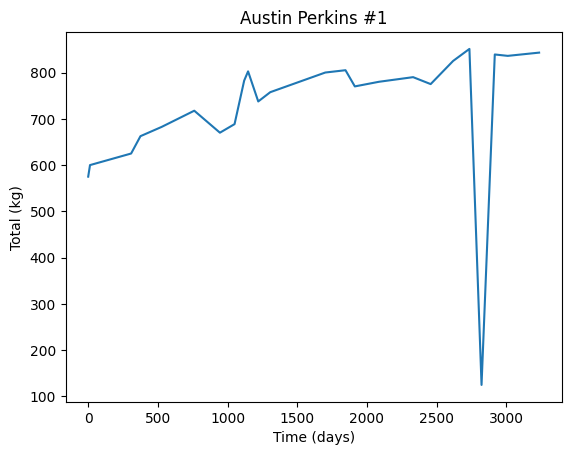

In [18]:
plot_lifter("Austin Perkins #1")

In [19]:
ap = lifters[lifters["Name"] == "Austin Perkins #1"]
recent = ap.sort_values("Time").tail(NUM_MEETS)
recent

,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,Squat3Kg,...,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Dots,Federation,ParentFederation,Time
310515,Austin Perkins #1,1,1,21.5,754,73.44,108,275.0,290.0,-295.0,...,285.0,295.0,300.0,300.0,770.0,13,559.98,149,4,1913
328892,Austin Perkins #1,1,1,21.5,731,73.15,159,267.5,282.5,292.5,...,282.5,300.0,312.5,312.5,780.0,0,568.73,149,16,2086
307234,Austin Perkins #1,1,1,22.5,754,72.50,111,270.0,282.5,292.5,...,280.0,297.5,317.5,317.5,790.0,0,579.43,149,16,2331
247744,Austin Perkins #1,1,1,23.0,731,72.95,111,275.0,287.5,-300.0,...,280.0,300.0,-325.0,300.0,775.0,0,566.10,149,16,2457
410086,Austin Perkins #1,1,1,23.5,754,73.90,111,280.0,295.0,305.0,...,285.0,305.0,325.0,325.0,825.0,0,597.54,149,16,2618
339604,Austin Perkins #1,1,1,23.5,754,74.24,111,287.5,303.5,313.5,...,302.5,327.5,337.5,337.5,851.0,0,614.54,149,16,2735
1888022,Austin Perkins #1,1,1,24.0,754,75.00,128,25.0,0.0,0.0,...,75.0,0.0,0.0,75.0,125.0,24,89.68,7,4,2822
1886120,Austin Perkins #1,1,1,24.0,754,73.25,108,292.5,308.0,318.0,...,307.5,326.0,0.0,326.0,839.0,0,611.20,7,4,2917
11533,Austin Perkins #1,1,1,24.5,1090,72.75,108,290.0,305.5,311.0,...,300.0,317.5,325.0,325.0,836.0,0,611.77,74,4,3010
27685,Austin Perkins #1,1,1,25.0,1090,73.90,159,300.0,315.0,323.0,...,305.0,320.0,-332.5,320.0,843.0,46,610.57,74,4,3235


In [20]:
out = lifters[["Name", "TotalKg", "Time"]].copy()
out = out.drop_duplicates(subset=["Name", "Time"])

In [21]:
total = out.pivot(index="Name", columns="Time", values="TotalKg")
total.head()

Time,0,1,2,3,4,5,6,7,8,9,...,18038,18166,18348,18381,18471,18542,18787,18955,19061,19123
Name,,,,,,,,,,,,,,,,,,,,,
A J Vasquez,458.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Mya Moss,247.21,NaN,NaN,NaN,NaN,NaN,NaN,258.55,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Phi Le,299.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A'Daireon Madlock,424.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A-Yun Lin,357.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
new_frame = []
for row in total.iterrows():
    max_index = row[1][row[1].notna()].idxmax()
    if max_index < 50:
        continue

    real_rows = row[1][row[1].notna()]
    temp = row[1].to_frame()

    temp = (temp.reindex(range(0, max_index + 1))
        .interpolate()
        .reset_index())

    # keep_indeces = range(0, max_index + 1, max_index // 50)
    keep_indeces = np.linspace(0, max_index, 50).astype(int)
    temp = temp.iloc[keep_indeces]
    
    temp = temp.rename(columns={"index": "Time", row[0]: "TotalKg"})
    temp.drop(["Time"], axis=1, inplace=True)
    temp.reset_index(inplace=True, drop=True)
    temp["Name"] = row[0]
    temp["max_index"] = max_index
    temp["Time"] = np.linspace(0, len(temp)-1, len(temp)).astype(int)
    temp.pivot(index = ["Name", "max_index"], columns="Time", values="TotalKg")
    temp = temp.to_numpy()
    new_frame.append(temp)

new_frame

[array([[458.13, 'A J Vasquez', 804, 0],
        [482.622, 'A J Vasquez', 804, 1],
        [507.11400000000003, 'A J Vasquez', 804, 2],
        [519.7404037267081, 'A J Vasquez', 804, 3],
        [520.4166770186335, 'A J Vasquez', 804, 4],
        [521.1352173913043, 'A J Vasquez', 804, 5],
        [521.8114906832299, 'A J Vasquez', 804, 6],
        [522.4877639751553, 'A J Vasquez', 804, 7],
        [523.2063043478261, 'A J Vasquez', 804, 8],
        [523.8825776397516, 'A J Vasquez', 804, 9],
        [524.6011180124224, 'A J Vasquez', 804, 10],
        [525.2773913043478, 'A J Vasquez', 804, 11],
        [525.9536645962733, 'A J Vasquez', 804, 12],
        [526.6722049689441, 'A J Vasquez', 804, 13],
        [527.3484782608696, 'A J Vasquez', 804, 14],
        [528.0670186335404, 'A J Vasquez', 804, 15],
        [528.7432919254659, 'A J Vasquez', 804, 16],
        [529.4195652173913, 'A J Vasquez', 804, 17],
        [530.1381055900621, 'A J Vasquez', 804, 18],
        [530.8143788819

In [73]:
n = np.array(new_frame)
n = np.concatenate(new_frame, axis=0)
n = pd.DataFrame(n, columns=["TotalKg", "Name", "MaxIndex", "Time"])


In [74]:
n.to_csv("openpowerlifting_interpolated.csv", index=False)